In [1]:
import sys
import subprocess
import cdsapi
import os
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs
from matplotlib import pyplot as plt

import errno
from dask.diagnostics import ProgressBar, progress
import scipy
import netCDF4

In [15]:
basedir = '/mnt/DataDrive2/data/mjolly/era5-land'
y=2015
zone="SAR"
ifile = '%s/era5-land-%s-daily_prcp-%s.nc' % (basedir,zone,y)
ds = xr.open_mfdataset(ifile,engine='netcdf4')
ifile = '%s/era5-land-%s-total_precipitation-%s*.nc' % (basedir,zone,y)
ds2 = xr.open_mfdataset(ifile,engine='netcdf4')

In [6]:
mydat = ds2.where(ds2.time.dt.hour == 0, drop=True)


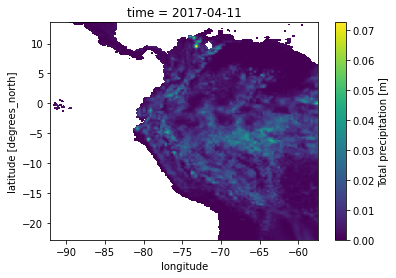

In [7]:
mydat.tp[100].plot()

In [16]:
ds2_pt = ds2.sel(latitude=-11.58257164274016,longitude=-70.61278378627453,method='nearest')
ds3_pt = mydat.sel(latitude=-11.58257164274016,longitude=-70.61278378627453,method='nearest')
ds3_pt = ds.sel(latitude=-11.58257164274016,longitude=-70.61278378627453,method='nearest')

<xarray.DataArray 'tp' ()>
array(2.3100743, dtype=float32)
Coordinates:
    longitude  float32 -70.6
    latitude   float32 -11.6

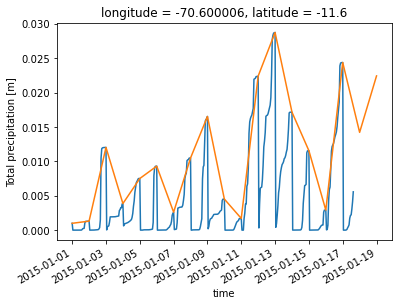

In [21]:
ds2_pt.tp[0:400].plot()
ds3_pt.tp[0:19].plot()
ds3_pt.tp.sum().compute()